In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.svm import SVC
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [107]:
file_path = r'C:\Users\Aya\Downloads\Python\Carbon_Emission.csv'

In [108]:
df = pd.read_csv(file_path)

In [109]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [111]:
# Remove rows with null values
df = df.dropna()

# Specify the columns to keep (example columns, replace with actual column names)
columns_to_keep = ['Body Type', 'Sex', 'Diet', 'Transport', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour','CarbonEmission']
df = df[columns_to_keep]

In [112]:
df.tail()

,Body Type,Sex,Diet,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
9994,normal,female,vegetarian,private,never,89,rarely,4482,large,5,15,17,22,2999
9995,obese,male,omnivore,private,sometimes,230,never,268,medium,5,12,27,9,2408
9996,normal,female,vegan,private,never,234,frequently,5316,extra large,3,14,8,24,3084
9998,underweight,male,vegan,private,often,179,rarely,8688,medium,5,19,14,5,4574
9999,obese,male,pescatarian,private,sometimes,115,never,9952,small,4,11,6,0,826


In [113]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n")
summary_stats

Summary Statistics:



,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,174.042086,5116.159805,3.993596,12.046966,25.188777,11.885636,2980.878012
std,72.316166,2900.543386,1.998082,7.105472,14.786173,7.367585,1211.476330
min,50.000000,3.000000,1.000000,0.000000,0.000000,0.000000,511.000000
25%,111.000000,2670.500000,2.000000,6.000000,12.000000,5.000000,2064.000000
50%,174.000000,5175.000000,4.000000,12.000000,25.000000,12.000000,2817.000000
75%,238.000000,7688.500000,6.000000,18.000000,38.000000,18.000000,3794.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [114]:
df = df.select_dtypes(exclude=['object','category'])

# Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n")
corr_matrix


Correlation Matrix:



,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.037268,0.006847,-0.009482,-0.009783,0.003207,0.096866
Vehicle Monthly Distance Km,0.037268,1.000000,0.015544,0.017037,0.005731,-0.009882,0.510942
Waste Bag Weekly Count,0.006847,0.015544,1.000000,0.005157,-0.016129,-0.006971,0.142284
How Long TV PC Daily Hour,-0.009482,0.017037,0.005157,1.000000,0.024173,0.003395,0.035245
How Many New Clothes Monthly,-0.009783,0.005731,-0.016129,0.024173,1.000000,0.009983,0.170899
How Long Internet Daily Hour,0.003207,-0.009882,-0.006971,0.003395,0.009983,1.000000,0.026826
CarbonEmission,0.096866,0.510942,0.142284,0.035245,0.170899,0.026826,1.000000


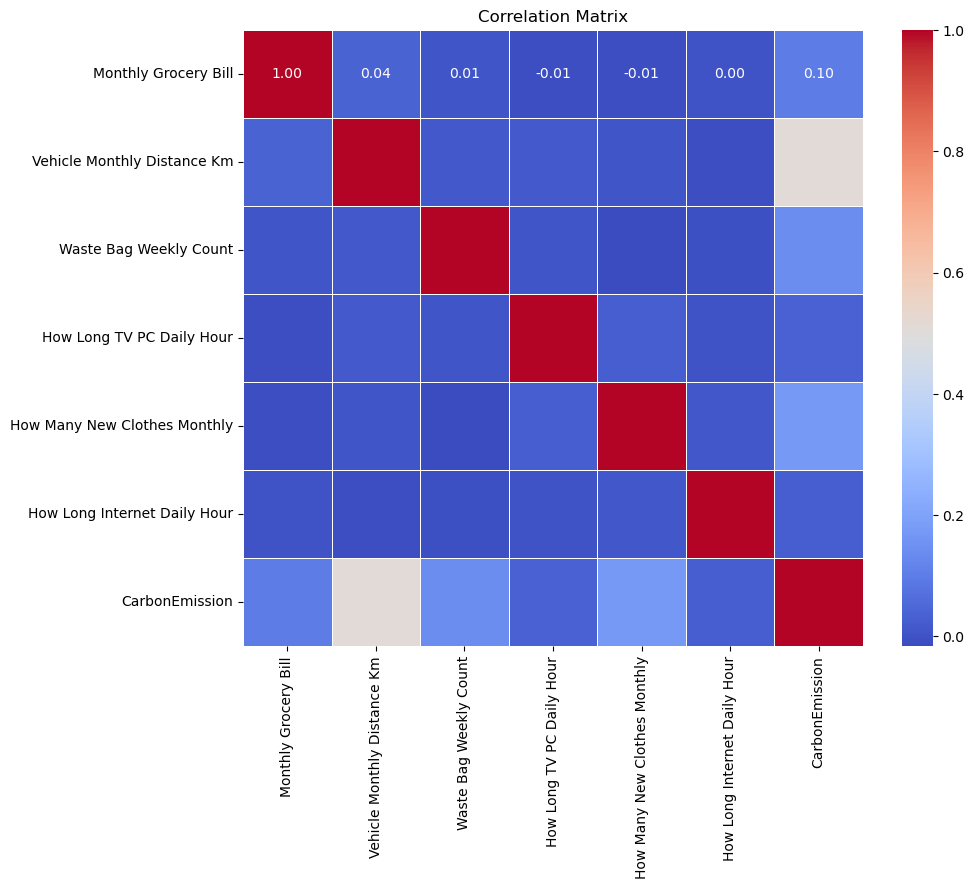

In [115]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

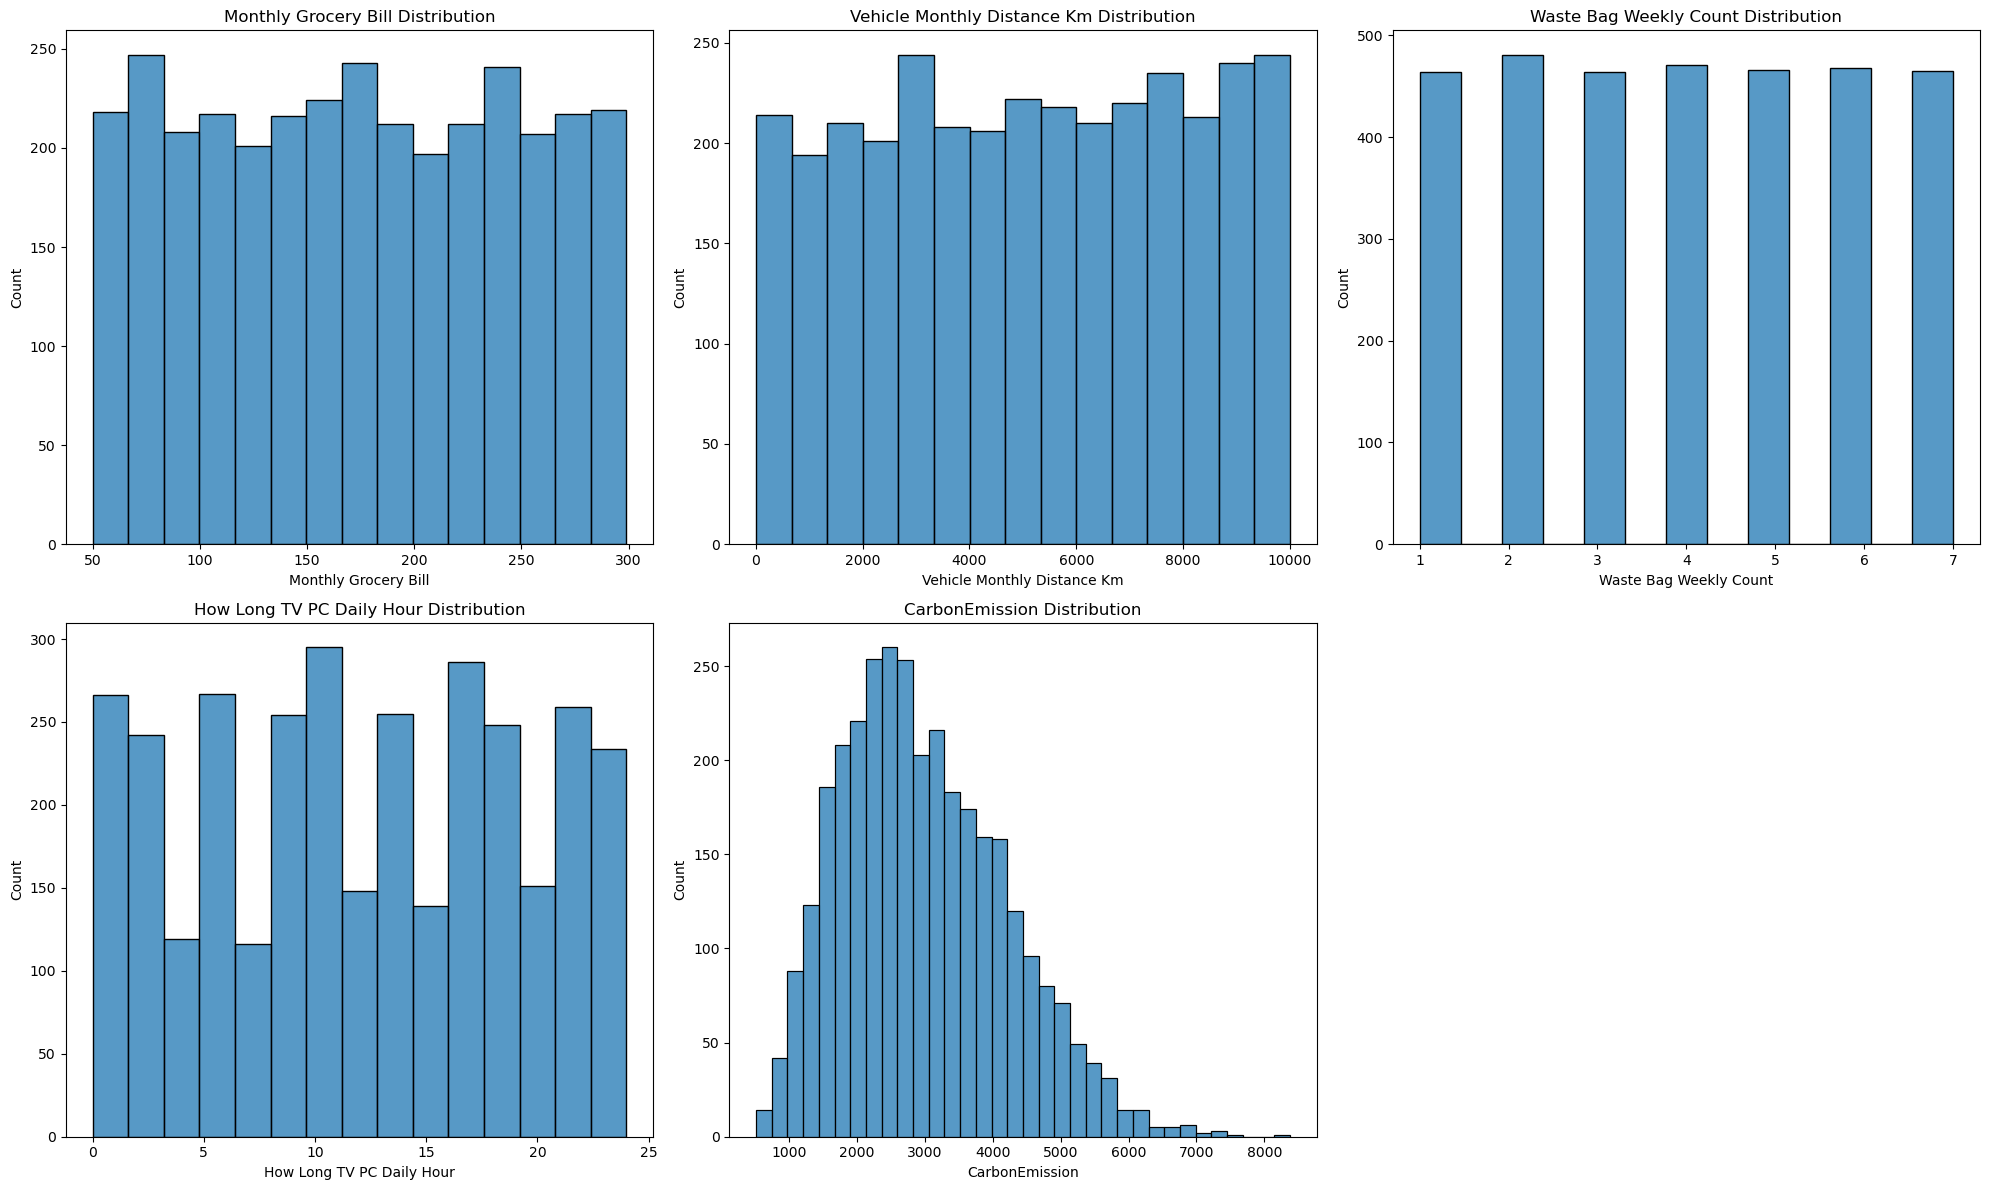

In [116]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(20, 12))

# Histograms of Numerical Features
plt.subplot(2, 3, 1)
sns.histplot(df['Monthly Grocery Bill'], kde=False)
plt.title('Monthly Grocery Bill Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Vehicle Monthly Distance Km'], kde=False)
plt.title('Vehicle Monthly Distance Km Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['Waste Bag Weekly Count'], kde=False)
plt.title('Waste Bag Weekly Count Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['How Long TV PC Daily Hour'], kde=False)
plt.title('How Long TV PC Daily Hour Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['CarbonEmission'], kde=False)
plt.title('CarbonEmission Distribution')

plt.tight_layout()
plt.show()

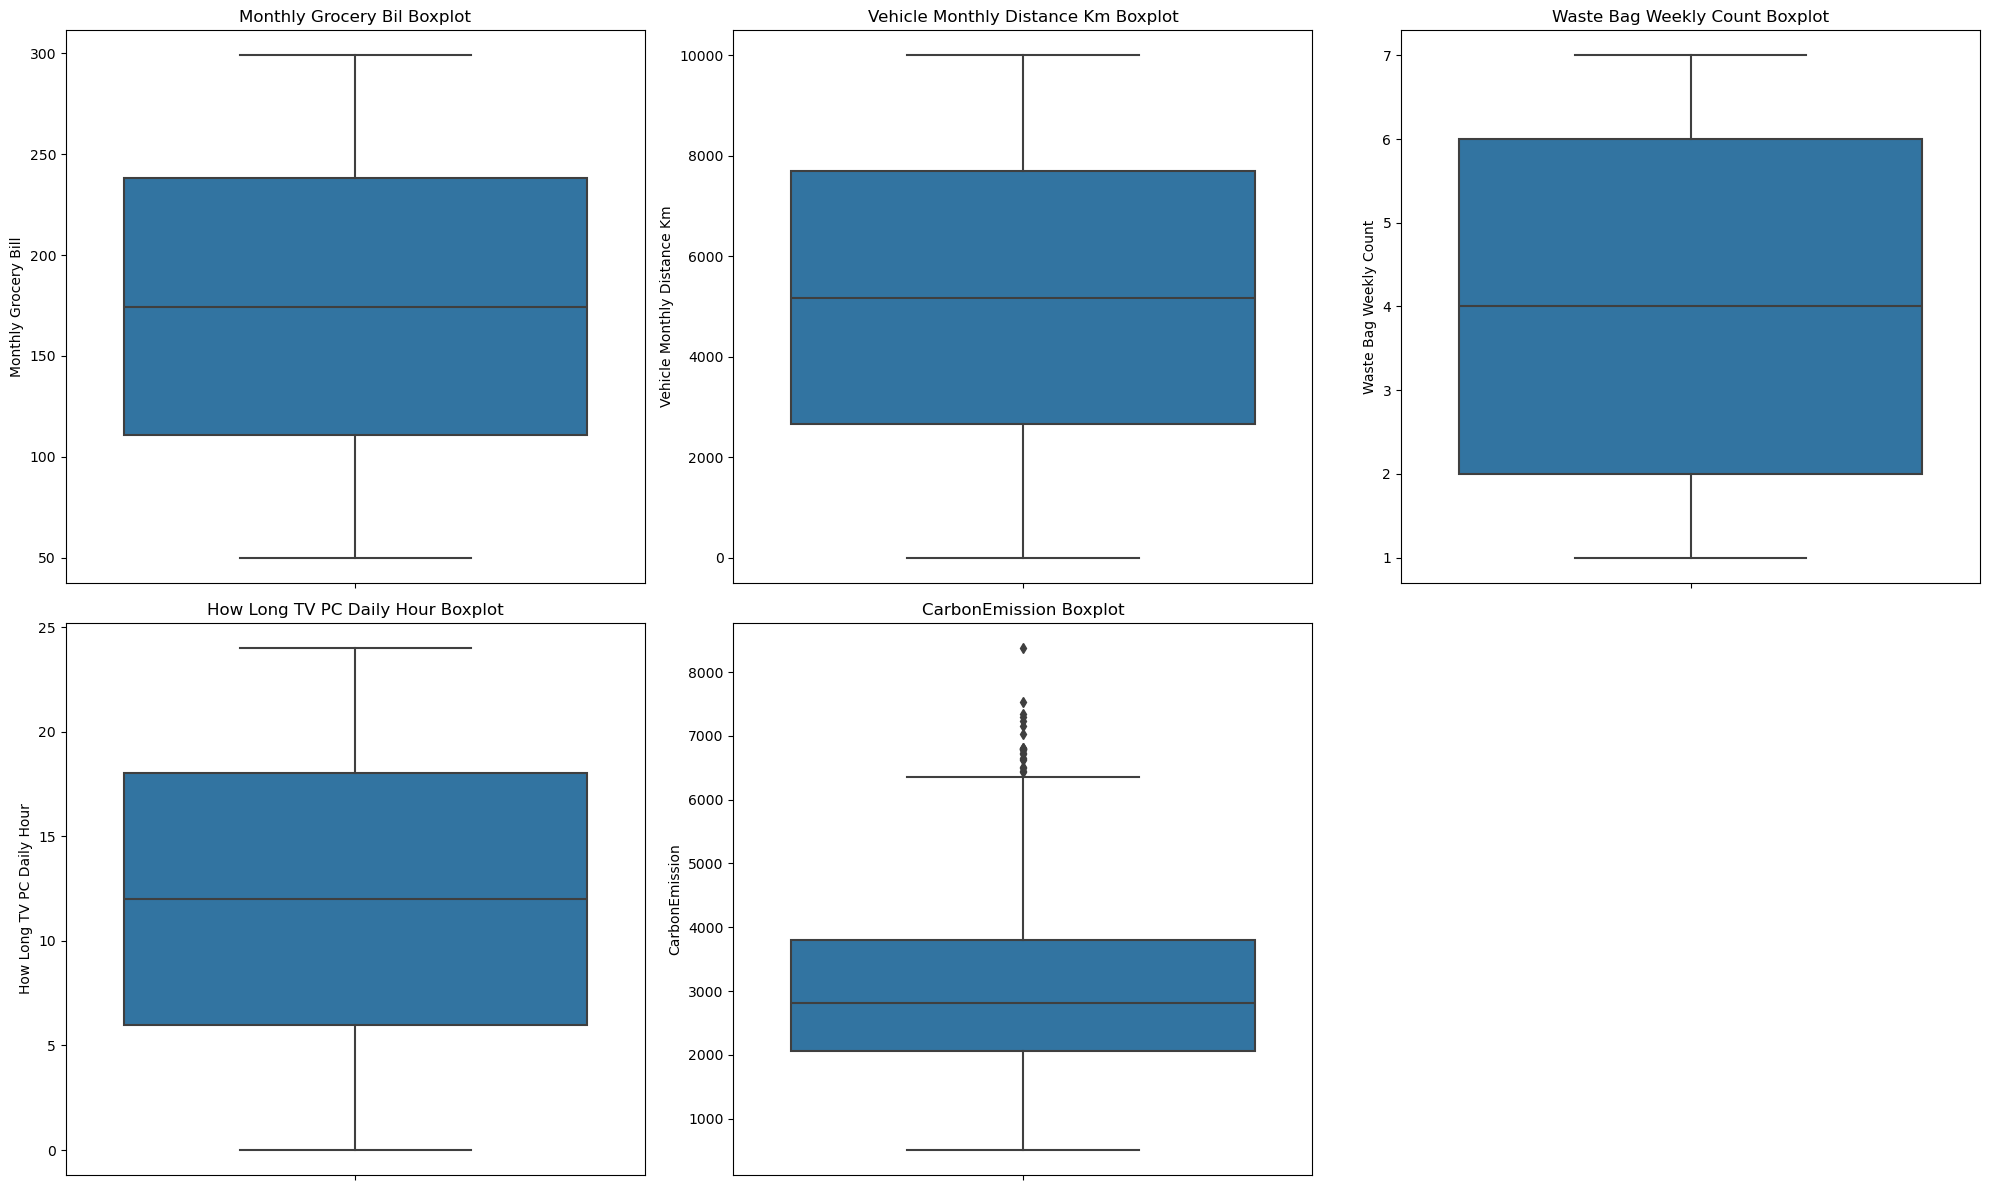

In [117]:
# Set up the matplotlib figure for boxplots
plt.figure(figsize=(20, 12))

# Boxplots to Detect Outliers
plt.subplot(2, 3, 1)
sns.boxplot(y=df['Monthly Grocery Bill'])
plt.title('Monthly Grocery Bil Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Vehicle Monthly Distance Km'])
plt.title('Vehicle Monthly Distance Km Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Waste Bag Weekly Count'])
plt.title('Waste Bag Weekly Count Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['How Long TV PC Daily Hour'])
plt.title('How Long TV PC Daily Hour Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['CarbonEmission'])
plt.title('CarbonEmission Boxplot')

plt.tight_layout()
plt.show()

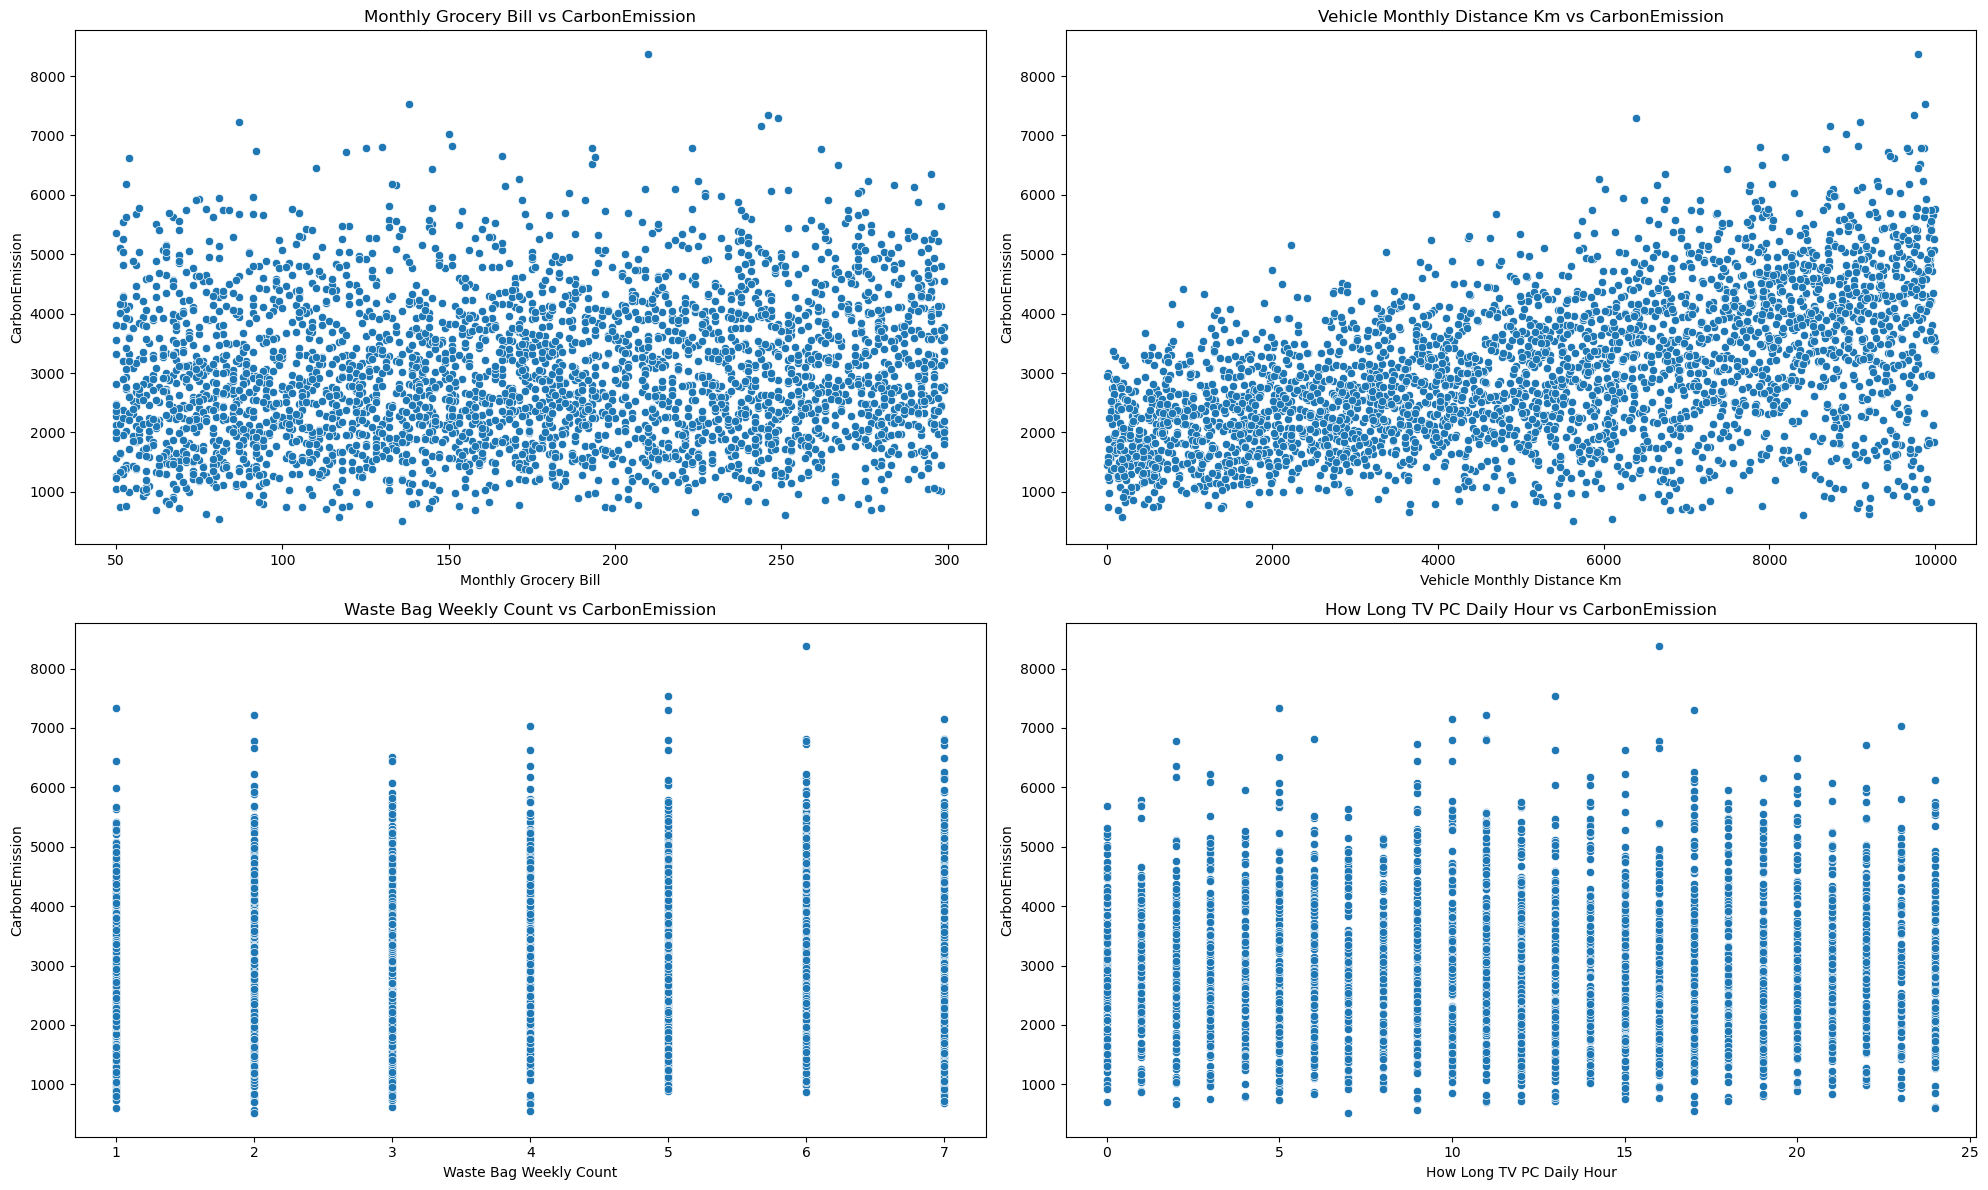

In [118]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Monthly Grocery Bill', y='CarbonEmission', data=df)
plt.title('Monthly Grocery Bill vs CarbonEmission')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Vehicle Monthly Distance Km', y='CarbonEmission', data=df)
plt.title('Vehicle Monthly Distance Km vs CarbonEmission')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Waste Bag Weekly Count', y='CarbonEmission', data=df)
plt.title('Waste Bag Weekly Count vs CarbonEmission')

plt.subplot(2, 2, 4)
sns.scatterplot(x='How Long TV PC Daily Hour', y='CarbonEmission', data=df)
plt.title('How Long TV PC Daily Hour vs CarbonEmission')

plt.tight_layout()
plt.show()

In [119]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [120]:
# Columns to check for outliers
columns_to_check = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'CarbonEmission']

# Remove outliers
ecommerce_data_clean = remove_outliers(df, columns_to_check)

# Display the shape of the original and cleaned data
print("Original data shape:", df.shape)
print("Cleaned data shape:", df.shape)

Original data shape: (3279, 7)
Cleaned data shape: (3279, 7)


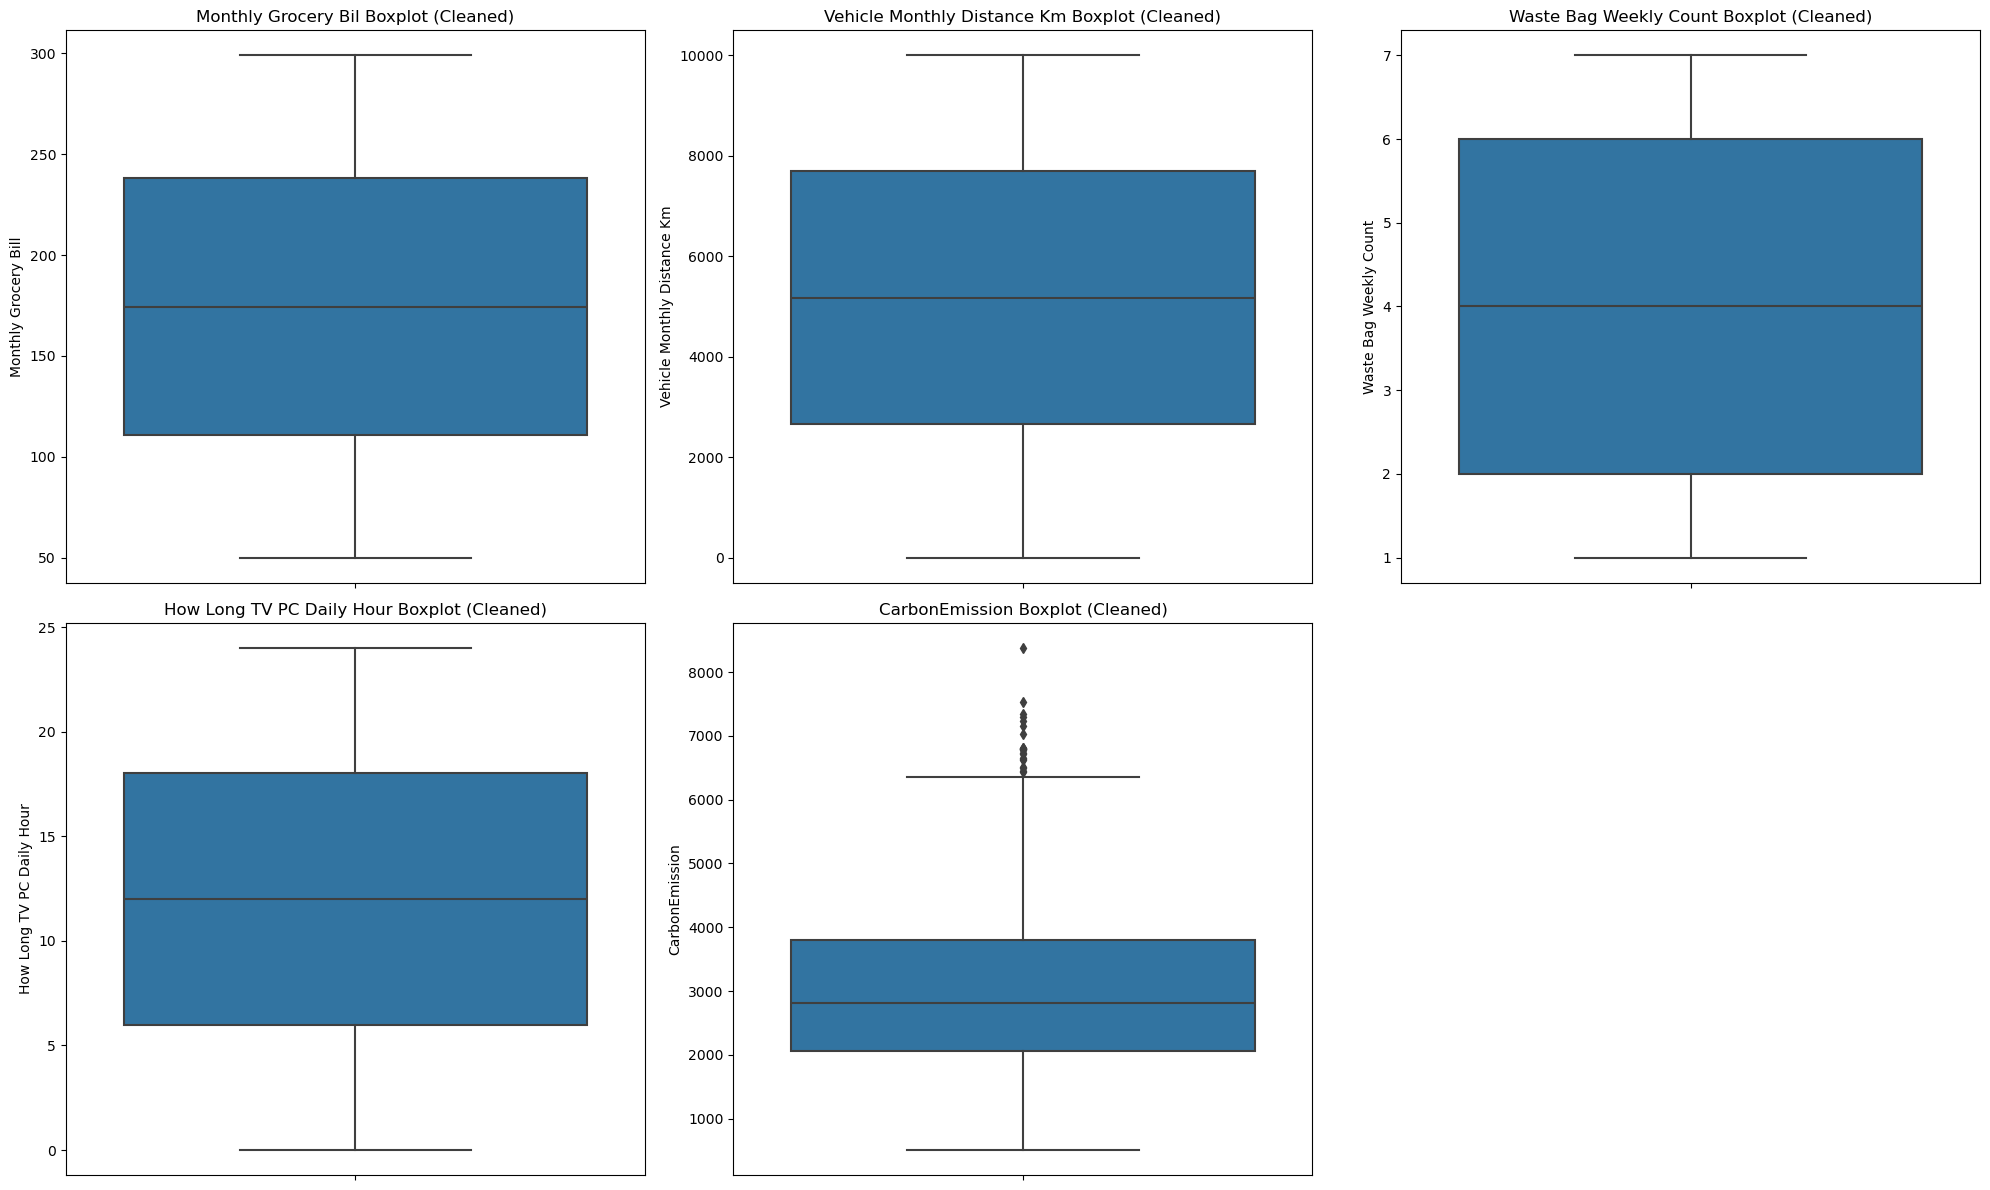

In [121]:
# Set up the matplotlib figure for boxplots
plt.figure(figsize=(20, 12))

# Boxplots to Detect Outliers
plt.subplot(2, 3, 1)
sns.boxplot(y=df['Monthly Grocery Bill'])
plt.title('Monthly Grocery Bil Boxplot (Cleaned)')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Vehicle Monthly Distance Km'])
plt.title('Vehicle Monthly Distance Km Boxplot (Cleaned)')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Waste Bag Weekly Count'])
plt.title('Waste Bag Weekly Count Boxplot (Cleaned)')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['How Long TV PC Daily Hour'])
plt.title('How Long TV PC Daily Hour Boxplot (Cleaned)')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['CarbonEmission'])
plt.title('CarbonEmission Boxplot (Cleaned)')

plt.tight_layout()
plt.show()

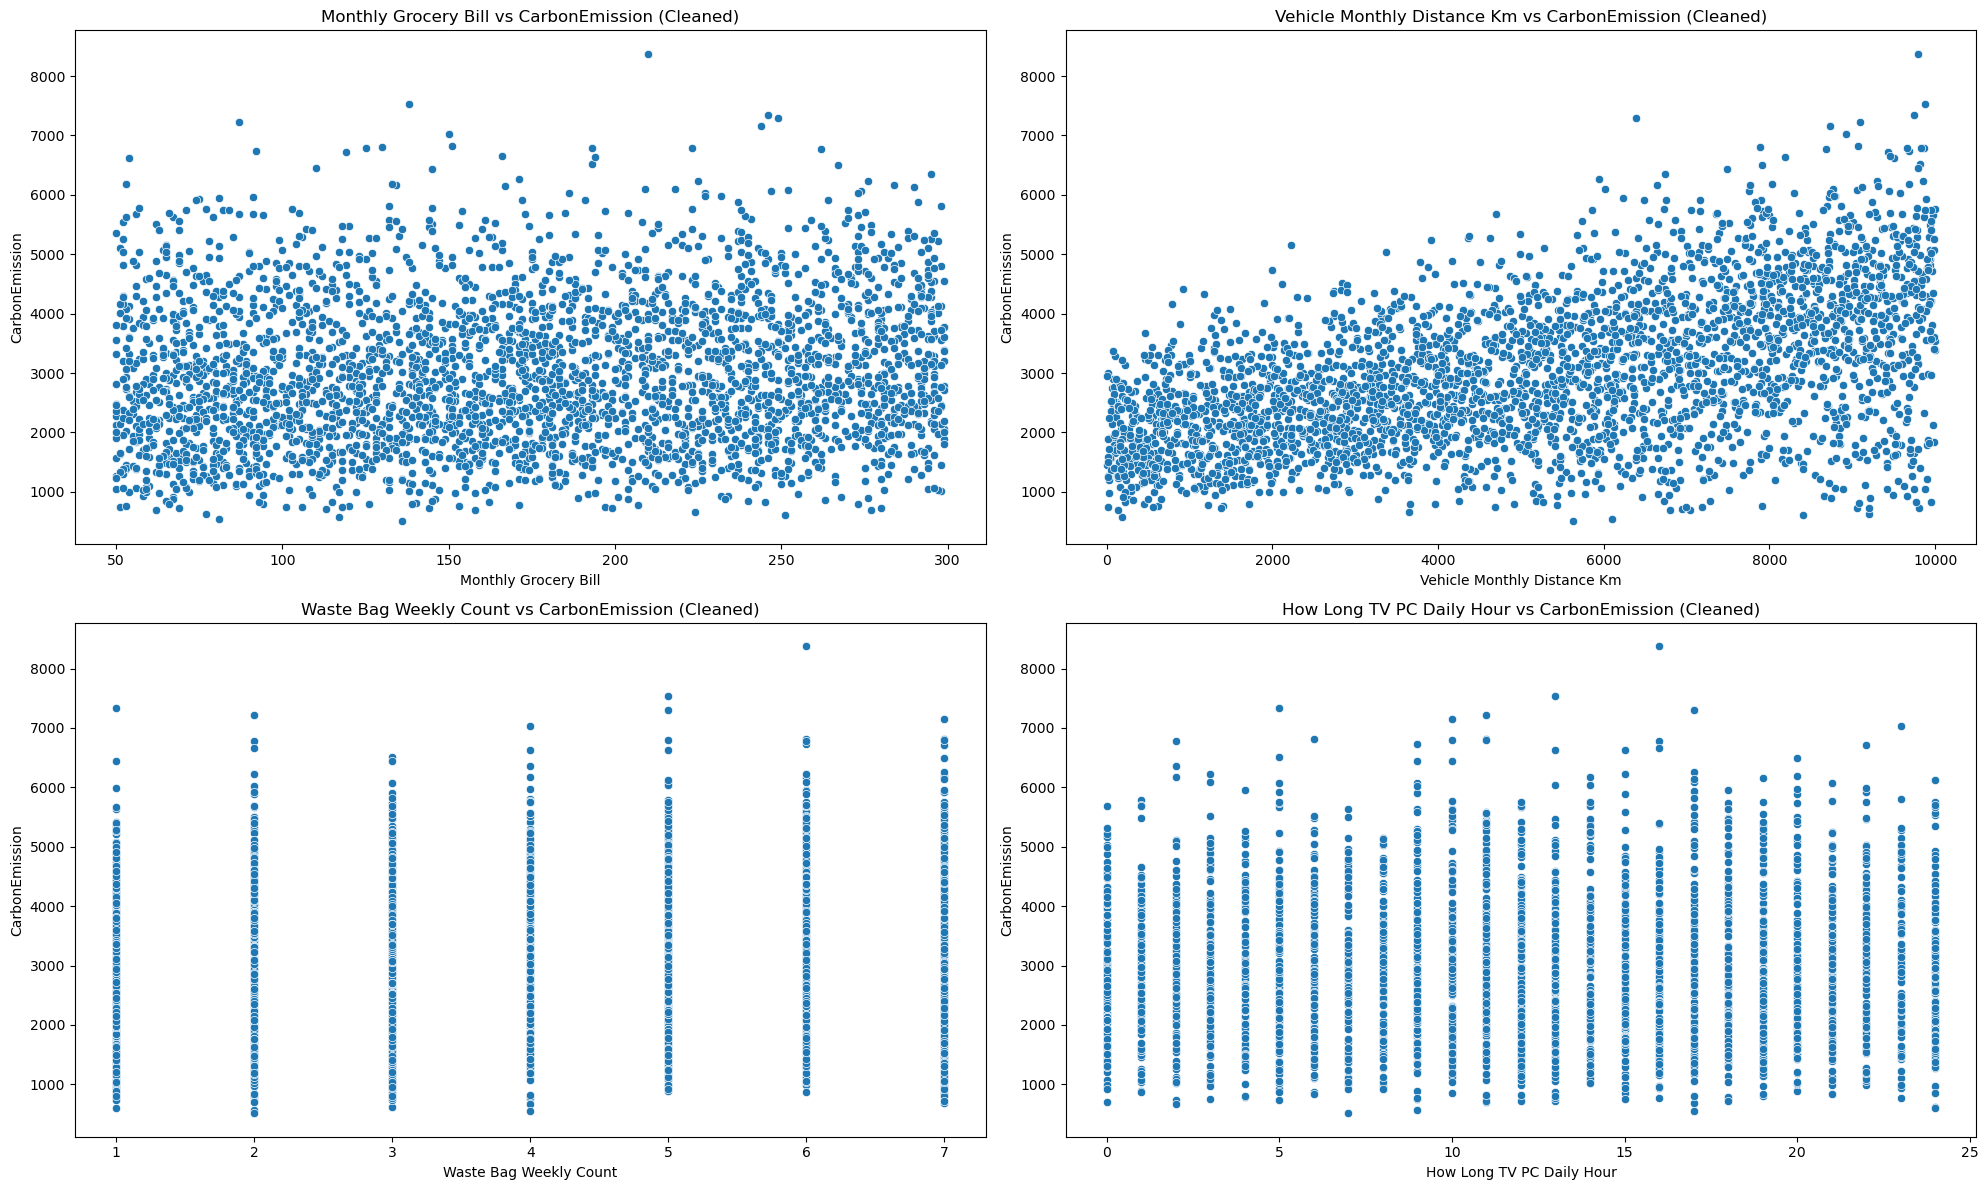

In [122]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Monthly Grocery Bill', y='CarbonEmission', data=df)
plt.title('Monthly Grocery Bill vs CarbonEmission (Cleaned)')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Vehicle Monthly Distance Km', y='CarbonEmission', data=df)
plt.title('Vehicle Monthly Distance Km vs CarbonEmission (Cleaned)')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Waste Bag Weekly Count', y='CarbonEmission', data=df)
plt.title('Waste Bag Weekly Count vs CarbonEmission (Cleaned)')

plt.subplot(2, 2, 4)
sns.scatterplot(x='How Long TV PC Daily Hour', y='CarbonEmission', data=df)
plt.title('How Long TV PC Daily Hour vs CarbonEmission (Cleaned)')

plt.tight_layout()
plt.show()

In [123]:
df = pd.read_csv(file_path)

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [124]:
# Columns to check for outliers
columns_to_check = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'CarbonEmission']

# Remove outliers
df_clean = remove_outliers(df, columns_to_check)

In [125]:
X = df_clean[['Monthly Grocery Bill','Vehicle Monthly Distance Km','Waste Bag Weekly Count','How Long TV PC Daily Hour']]
y =df_clean['CarbonEmission']


In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [127]:
# Initialize and train the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [129]:
# Make predictions
y_pred = lm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [130]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 532.0528390760832
Mean Squared Error: 431043.8684788423
Root Mean Squared Error: 656.5393122112661
R^2 Score: 0.14888225650386588


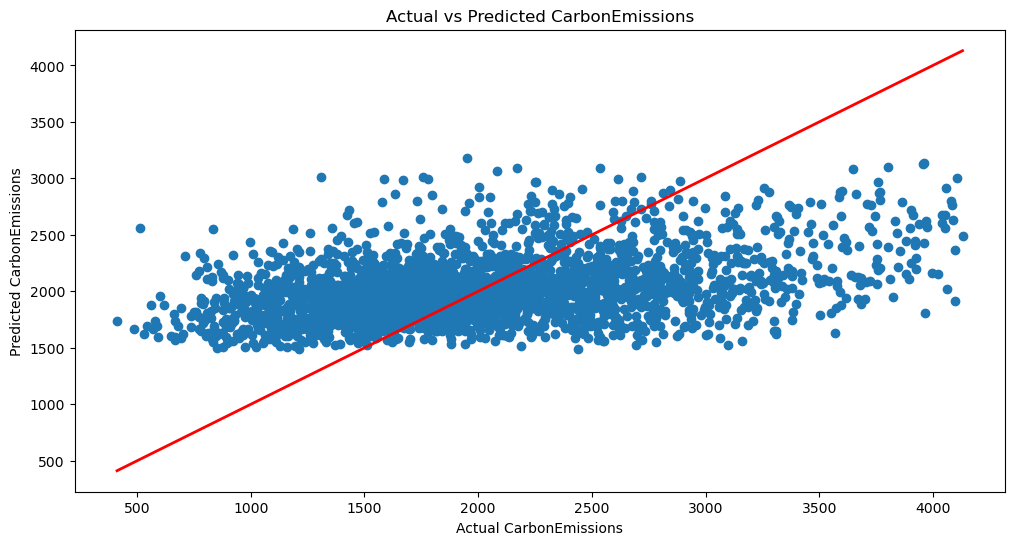

In [131]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted CarbonEmissions')
plt.xlabel('Actual CarbonEmissions')
plt.ylabel('Predicted CarbonEmissions')
plt.show()
